In [ ]:
1. 가격 추세 분석
목적: 특정 지역이나 기간 동안의 부동산 가격 변동 추세를 분석
분석 방법: 평균 가격, 중위수 가격 등을 시간별로 비교하거나, 특정 지역에서의 가격 변화를 추적. 
           이를 통해 시장의 상승 또는 하락 추세를 파악할 수 있다.
2. 지역별 가격 비교
목적: 서로 다른 지역의 부동산 가격을 비교하여 특정 지역의 평균 가격이나 평당 가격 등을 비교한다.
분석 방법: 지역별 평균, 중위수, 최고 및 최저 가격을 산출하고, 지도 시각화를 통해 지역 간 차이를 시각적으로 표현할 수 있다.
3. 부동산 유형별 가격 분석
목적: 아파트, 원룸, 오피스텔 등 다양한 유형의 부동산 가격을 비교 분석
분석 방법: 유형별로 데이터를 분류하고, 평균 가격, 면적당 가격 등을 계산하여 비교한다. 어떤 유형이 가장 가격이 높거나 인기가 있는지 파악할 수 있다.
4. 면적 대비 가격 분석
목적: 부동산의 면적 대비 가격을 분석하여 단위 면적당 가격의 분포와 추이를 분석
분석 방법: 평당 가격 또는 제곱미터당 가격을 계산하여 이를 바탕으로 가격 대비 면적이 얼마나 비싼지 또는 저렴한지를 평가할 수 있다.
5. 임대료 및 매매 가격 비교
목적: 임대 시장과 매매 시장의 가격 차이를 비교 분석
분석 방법: 임대료와 매매 가격을 비교하여, 임대 수익률을 계산하거나, 임대가 유리한지 매매가 유리한지 분석할 수 있다.
6. 거래량 분석
목적: 특정 기간 동안의 거래량 변화를 분석하여 시장의 활발함 또는 침체 여부를 판단
분석 방법: 거래량 데이터를 시간 또는 지역별로 집계하고, 이를 시계열 분석하여 거래량 추세를 파악
7. 연령대 및 가구 형태별 선호 부동산 분석
목적: 특정 연령대 또는 가구 형태(예: 1인 가구, 4인 가구 등)에 따라 선호하는 부동산 유형을 분석
분석 방법: 연령대별 또는 가구 형태별로 데이터를 분류하고, 각 그룹이 선호하는 부동산 유형을 파악
8. 부동산 투자 수익률 분석
목적: 부동산의 투자 수익률을 분석하여 수익성을 평가
분석 방법: 매매가 대비 임대 수익률, 자본 수익률, 총 투자 수익률 등을 계산하여 어느 지역이나 유형이 가장 높은 수익을 제공하는지 분석
9. 부동산 가격 예측
목적: 향후 부동산 가격을 예측하여 투자 전략
분석 방법: 머신러닝 모델을 활용해 과거 데이터를 학습시켜 미래의 가격을 예측. 시계열 예측 모델, 회귀 분석 등을 사용
10. 인프라 접근성 분석
목적: 교통, 교육, 상업시설 등 주요 인프라와 부동산 가격 사이의 관계를 분석
분석 방법: 각 부동산의 위치 데이터를 이용해 주요 인프라와의 거리, 접근성 등을 측정, 이를 가격과 연관시켜 분석
           지도 시각화를 통해 결과를 표현

In [71]:
import requests
import pandas as pd

# 수집할 빌라 매물 ID 목록 (예시)
villa_ids = [41778408, 41778409, 41778410]  # 여기에 더 많은 ID를 추가할 수 있습니다.

# 수집된 데이터를 저장할 리스트
data_list = []

# 각 ID에 대해 데이터 수집
for villa_id in villa_ids:
    url = f"https://apis.zigbang.com/v3/items/{villa_id}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json().get('item', {})
        if data:
            data_list.append(data)
    else:
        print(f"Failed to retrieve data for ID: {villa_id}, Status Code: {response.status_code}")

# 데이터프레임 생성 (모든 컬럼 포함)
df = pd.DataFrame(data_list)

# 파일 경로 설정
xlsx_file_path = 'C:/Users/user/Documents/python/project_ex/villa_data.xlsx'

# 데이터프레임을 xlsx 파일로 저장 (모든 컬럼 포함)
df.to_excel(xlsx_file_path, index=False)

# 저장 경로 출력
print(f"Data saved to {xlsx_file_path}")

Data saved to C:/Users/user/Documents/python/project_ex/villa_data.xlsx


In [1]:
import pandas as pd
import json

# 엑셀 파일 불러오기
file_path = 'C:/Users/user/Documents/python/project_ex/seoul_apt_subway_update.xlsx'  # 엑셀 파일 경로로 변경
df = pd.read_excel(file_path)

# 'recentlyTransaction' 컬럼에서 필요한 데이터만 추출
df['recentlyTransaction'] = df['recentlyTransaction'].apply(lambda x: json.loads(x))

# rentList만 추출
df['rentList'] = df['recentlyTransaction'].apply(lambda x: x['rentList'])

# netArea별로 데이터를 그룹화하는 함수
def group_by_net_area(rent_list):
    grouped = {}
    for item in rent_list:
        net_area = item['netArea']['m2']
        if net_area not in grouped:
            grouped[net_area] = []
        grouped[net_area].append(item)
    return grouped

# 각 행에 대해 그룹화된 데이터 생성
df['groupedTransactions'] = df['rentList'].apply(group_by_net_area)

# 결과 확인
print(df['groupedTransactions'])

# groupedTransactions를 각각의 시트로 저장하려면 아래 코드를 사용합니다.
with pd.ExcelWriter('grouped_transactions.xlsx') as writer:
    for i, row in df.iterrows():
        sheet_name = f"Sheet_{i+1}"
        grouped_data = row['groupedTransactions']
        for net_area, transactions in grouped_data.items():
            trans_df = pd.DataFrame(transactions)
            trans_df.to_excel(writer, sheet_name=f'{sheet_name}_NetArea_{net_area}', index=False)

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

In [ ]:
import pandas as pd
import ast
import json

# 엑셀 파일 불러오기
file_path = 'C:/Users/user/Documents/python/project_ex/seoul_apt_subway_update.xlsx'  # 엑셀 파일 경로로 변경
df = pd.read_excel(file_path)

# 'recentlyTransaction' 컬럼에서 JSON 형식으로 파싱
def parse_json(x):
    try:
        return json.loads(x.replace("'", "\""))  # 작은 따옴표를 큰따옴표로 변환
    except json.JSONDecodeError:
        return ast.literal_eval(x)  # JSON 형식이 아니면, 파이썬 딕셔너리로 변환

df['recentlyTransaction'] = df['recentlyTransaction'].apply(parse_json)

# rentList만 추출
df['rentList'] = df['recentlyTransaction'].apply(lambda x: x['rentList'])

# netArea별로 데이터를 그룹화하는 함수
def group_by_net_area(rent_list):
    grouped = {}
    for item in rent_list:
        net_area = item['netArea']['m2']
        if net_area not in grouped:
            grouped[net_area] = []
        grouped[net_area].append(item)
    return grouped

# 각 행에 대해 그룹화된 데이터 생성
df['groupedTransactions'] = df['rentList'].apply(group_by_net_area)

# 결과 확인
print(df['groupedTransactions'])

# groupedTransactions를 각각의 시트로 저장하려면 아래 코드를 사용합니다.
with pd.ExcelWriter('grouped_transactions.xlsx') as writer:
    for i, row in df.iterrows():
        sheet_name = f"Sheet_{i+1}"
        grouped_data = row['groupedTransactions']
        for net_area, transactions in grouped_data.items():
            trans_df = pd.DataFrame(transactions)
            trans_df.to_excel(writer, sheet_name=f'{sheet_name}_NetArea_{net_area}', index=False)

In [1]:
import pandas as pd

# Load the Excel file
file_path = 'C:/Users/user/Documents/python/project_ex/seoul_apt_subway_update.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to understand its structure
df.head()

,name,address,lat,lng,title,desc,researchDate,localPricePerSize,recentlyTransaction,area,pricePerSize,subway
0,롯데캐슬모닝,서울시 강남구 도곡동 551-28,37.490306,127.036650,NaN,NaN,NaN,"{'localName': '도곡동', 'salesPrice': 3673, 'rent...","{'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...","{'sales': {'type': '매매', 'minPrice': 186000, '...",NaN,X
1,테헤란로대우아이빌,서울시 강남구 대치동 891-6,37.505688,127.054002,NaN,테헤란로대우아이빌은 교통이 편리한 단지에요. 2호선과 분당선이 만나는 선릉역이 걸어...,2019.08.09,"{'localName': '대치동', 'salesPrice': 4413, 'rent...","{'salesPeriod': '3개월', 'salesCnt': 2, 'salesLi...","{'sales': {'type': '매매', 'minPrice': 36000, 'm...",NaN,O
2,장인이즈빌,서울시 강동구 길동 475,37.540089,127.143339,NaN,NaN,NaN,"{'localName': '길동', 'salesPrice': 1924, 'rentP...","{'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...","{'sales': {'type': '매매', 'minPrice': 64000, 'm...",NaN,X
3,천호우림루미아트1차,서울시 강동구 천호동 47-24,37.544119,127.139694,NaN,NaN,NaN,"{'localName': '천호동', 'salesPrice': 1732, 'rent...","{'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...","{'sales': {'type': '매매', 'minPrice': 59000, 'm...",NaN,X
4,광남캐스빌,서울시 강동구 천호동 52-1,37.542501,127.139695,NaN,NaN,NaN,"{'localName': '천호동', 'salesPrice': 1732, 'rent...","{'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...","{'sales': {'type': '매매', 'minPrice': 60000, 'm...",NaN,X


In [3]:
import json

# Function to parse the 'recentlyTransaction' JSON and extract relevant fields
def parse_recent_transaction(data):
    if pd.isna(data):
        return pd.Series([None] * 5)
    transaction = json.loads(data)
    net_area = transaction.get('netArea')
    gross_area = transaction.get('grossArea')
    utime = transaction.get('utime')
    floor = transaction.get('floor')
    type_ = transaction.get('type')
    return pd.Series([net_area, gross_area, utime, floor, type_])

# Apply the function and create new columns
df[['netArea', 'grossArea', 'utime', 'floor', 'type']] = df['recentlyTransaction'].apply(parse_recent_transaction)

# Display the updated DataFrame
df.head()

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

In [5]:
# Check the content of the 'recentlyTransaction' column for the first few rows
df['recentlyTransaction'].head(10)

0    {'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...
1    {'salesPeriod': '3개월', 'salesCnt': 2, 'salesLi...
2    {'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...
3    {'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...
4    {'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...
5    {'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...
6    {'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...
7    {'salesPeriod': '3개월', 'salesCnt': 4, 'salesLi...
8    {'salesPeriod': '3개월', 'salesCnt': 3, 'salesLi...
9    {'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...
Name: recentlyTransaction, dtype: object

In [7]:
# Adjusting the function to handle the dictionary-like strings directly
def parse_recent_transaction(data):
    if pd.isna(data):
        return pd.Series([None] * 5)
    # Evaluate the string to convert it into a dictionary
    transaction = eval(data)
    net_area = transaction.get('netArea')
    gross_area = transaction.get('grossArea')
    utime = transaction.get('utime')
    floor = transaction.get('floor')
    type_ = transaction.get('type')
    return pd.Series([net_area, gross_area, utime, floor, type_])

# Apply the function and create new columns
df[['netArea', 'grossArea', 'utime', 'floor', 'type']] = df['recentlyTransaction'].apply(parse_recent_transaction)

# Display the updated DataFrame
df.head()

,name,address,lat,lng,title,desc,researchDate,localPricePerSize,recentlyTransaction,area,pricePerSize,subway,netArea,grossArea,utime,floor,type
0,롯데캐슬모닝,서울시 강남구 도곡동 551-28,37.490306,127.036650,NaN,NaN,NaN,"{'localName': '도곡동', 'salesPrice': 3673, 'rent...","{'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...","{'sales': {'type': '매매', 'minPrice': 186000, '...",NaN,X,None,None,None,None,None
1,테헤란로대우아이빌,서울시 강남구 대치동 891-6,37.505688,127.054002,NaN,테헤란로대우아이빌은 교통이 편리한 단지에요. 2호선과 분당선이 만나는 선릉역이 걸어...,2019.08.09,"{'localName': '대치동', 'salesPrice': 4413, 'rent...","{'salesPeriod': '3개월', 'salesCnt': 2, 'salesLi...","{'sales': {'type': '매매', 'minPrice': 36000, 'm...",NaN,O,None,None,None,None,None
2,장인이즈빌,서울시 강동구 길동 475,37.540089,127.143339,NaN,NaN,NaN,"{'localName': '길동', 'salesPrice': 1924, 'rentP...","{'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...","{'sales': {'type': '매매', 'minPrice': 64000, 'm...",NaN,X,None,None,None,None,None
3,천호우림루미아트1차,서울시 강동구 천호동 47-24,37.544119,127.139694,NaN,NaN,NaN,"{'localName': '천호동', 'salesPrice': 1732, 'rent...","{'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...","{'sales': {'type': '매매', 'minPrice': 59000, 'm...",NaN,X,None,None,None,None,None
4,광남캐스빌,서울시 강동구 천호동 52-1,37.542501,127.139695,NaN,NaN,NaN,"{'localName': '천호동', 'salesPrice': 1732, 'rent...","{'salesPeriod': '3개월', 'salesCnt': 0, 'salesLi...","{'sales': {'type': '매매', 'minPrice': 60000, 'm...",NaN,X,None,None,None,None,None


In [9]:
import pandas as pd

# Load the Excel file
file_path = 'C:/Users/user/Documents/python/project_ex/seoul_apt_subway_update.xlsx'
df = pd.read_excel(file_path)

# Function to parse the 'recentlyTransaction' column
def parse_recent_transaction(data):
    if pd.isna(data):
        return pd.Series([None] * 5)
    transaction = eval(data)
    # Extract rentList
    rent_list = transaction.get('rentList', [])
    # Handling multiple transactions
    if rent_list:
        # Using the first rent transaction for simplicity
        rent_transaction = rent_list[0]
        net_area = rent_transaction.get('netArea', {}).get('m2')
        gross_area = rent_transaction.get('grossArea', {}).get('m2')
        utime = rent_transaction.get('utime')
        floor = rent_transaction.get('floor')
        type_ = rent_transaction.get('type')
    else:
        return pd.Series([None] * 5)
    return pd.Series([net_area, gross_area, utime, floor, type_])

# Apply the function and create new columns
df[['netArea', 'grossArea', 'utime', 'floor', 'type']] = df['recentlyTransaction'].apply(parse_recent_transaction)

# Save the updated DataFrame to a new Excel file
output_file_path = 'C:/Users/user/Documents/python/project_ex/seoul_apt_subway_updated.xlsx'
df.to_excel(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")

DataFrame saved to C:/Users/user/Documents/python/project_ex/seoul_apt_subway_updated.xlsx


In [11]:
import pandas as pd

# Load the Excel file
file_path = 'C:/Users/user/Documents/python/project_ex/seoul_apt_subway_update.xlsx'
df = pd.read_excel(file_path)

# Function to expand each row based on the 'recentlyTransaction' column
def expand_transactions(row):
    data = row['recentlyTransaction']
    if pd.isna(data):
        return None
    transaction = eval(data)
    rent_list = transaction.get('rentList', [])
    
    # Create a list of rows for each rent transaction
    rows = []
    for rent_transaction in rent_list:
        net_area = rent_transaction.get('netArea', {}).get('m2')
        gross_area = rent_transaction.get('grossArea', {}).get('m2')
        utime = rent_transaction.get('utime')
        floor = rent_transaction.get('floor')
        type_ = rent_transaction.get('type')
        # Append new row with additional columns
        new_row = row.copy()
        new_row['netArea'] = net_area
        new_row['grossArea'] = gross_area
        new_row['utime'] = utime
        new_row['floor'] = floor
        new_row['type'] = type_
        rows.append(new_row)
    
    return pd.DataFrame(rows)

# Apply the function to expand each row
expanded_df = df.apply(expand_transactions, axis=1)

# Concatenate all the expanded dataframes into a single dataframe
expanded_df = pd.concat(expanded_df.tolist(), ignore_index=True)

# Save the expanded DataFrame to a new Excel file
output_file_path = 'C:/Users/user/Documents/python/project_ex/seoul_apt_subway_expanded.xlsx'
expanded_df.to_excel(output_file_path, index=False)

print(f"Expanded DataFrame saved to {output_file_path}")

Expanded DataFrame saved to C:/Users/user/Documents/python/project_ex/seoul_apt_subway_expanded.xlsx


In [13]:
import pandas as pd

# Load the Excel file
file_path = 'C:/Users/user/Documents/python/project_ex/seoul_apt_subway_update.xlsx'
df = pd.read_excel(file_path)

# Function to expand each row based on the 'recentlyTransaction' column
def expand_transactions(row):
    data = row['recentlyTransaction']
    if pd.isna(data):
        return None
    
    transaction = eval(data)
    # Combine rentList and salesList, adding a flag to identify the type
    combined_list = [
        {**item, 'transactionType': 'rent'} for item in transaction.get('rentList', [])
    ] + [
        {**item, 'transactionType': 'sales'} for item in transaction.get('salesList', [])
    ]
    
    # Create a list of rows for each transaction
    rows = []
    for item in combined_list:
        net_area = item.get('netArea', {}).get('m2')
        gross_area = item.get('grossArea', {}).get('m2')
        utime = item.get('utime')
        floor = item.get('floor')
        type_ = item.get('type')
        transaction_type = item.get('transactionType')
        
        # Append new row with additional columns
        new_row = row.copy()
        new_row['netArea'] = net_area
        new_row['grossArea'] = gross_area
        new_row['utime'] = utime
        new_row['floor'] = floor
        new_row['type'] = type_
        new_row['transactionType'] = transaction_type
        rows.append(new_row)
    
    return pd.DataFrame(rows)

# Apply the function to expand each row
expanded_df = df.apply(expand_transactions, axis=1)

# Concatenate all the expanded dataframes into a single dataframe
expanded_df = pd.concat(expanded_df.tolist(), ignore_index=True)

# Save the expanded DataFrame to a new Excel file
output_file_path = 'C:/Users/user/Documents/python/project_ex/seoul_apt_subway_expanded.xlsx'
expanded_df.to_excel(output_file_path, index=False)

print(f"Expanded DataFrame saved to {output_file_path}")

Expanded DataFrame saved to C:/Users/user/Documents/python/project_ex/seoul_apt_subway_expanded.xlsx


In [17]:
import pandas as pd

# Load the Excel file
file_path = 'C:/Users/user/Documents/python/project_ex/all_mamul_data.xlsx'
df = pd.read_excel(file_path)

# Function to check for subway-related terms in the title or description
def check_subway(row):
    subway_terms = ['역세권', '전철', '호선', '지하철']
    combined_text = f"{row['title']} {row['description']}"
    if any(term in combined_text for term in subway_terms):
        return 'O'
    else:
        return 'X'

# Apply the function to create the subway column
df['subway'] = df.apply(check_subway, axis=1)

# Save the updated DataFrame to a new Excel file
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_mamul_data_with_subway.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path

'C:/Users/user/Documents/python/project_ex/all_mamul_data_with_subway.xlsx'

In [19]:
import pandas as pd

# 서울시 위도 및 경도 범위
seoul_lat_min = 37.4133
seoul_lat_max = 37.7151
seoul_lng_min = 126.7341
seoul_lng_max = 127.2693

# 엑셀 파일 불러오기
file_path = 'C:/Users/user/Documents/python/project_ex/all_mamul_data_with_subway.xlsx'  # 여기에 파일 경로를 입력하세요
df = pd.read_excel(file_path)

# 서울시에 위치한 데이터만 필터링
seoul_df = df[(df['lat'] >= seoul_lat_min) & (df['lat'] <= seoul_lat_max) &
              (df['lng'] >= seoul_lng_min) & (df['lng'] <= seoul_lng_max)]

# 결과를 새로운 엑셀 파일로 저장
output_file_path = 'seoul_filtered_data.xlsx'
seoul_df.to_excel(output_file_path, index=False)

print(f"서울시에 위치한 데이터만 필터링하여 '{output_file_path}'에 저장했습니다.")

서울시에 위치한 데이터만 필터링하여 'seoul_filtered_data.xlsx'에 저장했습니다.


In [21]:
import pandas as pd

# 서울시 위도 및 경도 범위
seoul_lat_min = 37.4133
seoul_lat_max = 37.7151
seoul_lng_min = 126.7341
seoul_lng_max = 127.2693

# 동과 구에 대한 필터링 조건을 사전 형태로 정의합니다.
seoul_areas = {
    '강남구': ["압구정1동", "압구정2동", "도곡1동", "도곡2동", "논현1동", "논현2동", "삼성1동", "삼성2동", "청담1동", "청담2동", "대치1동", "대치2동", "대치3동", "대치4동", "개포1동", "개포2동", "개포3동", "개포4동", "신사동", "일원본동", "일원1동", "일원2동", "수서동", "역삼1동", "역삼2동", "세곡동"],
    '강동구': ["천호1동", "천호2동", "천호3동", "천호4동", "길1동", "길2동", "상일동", "강일동", "암사1동", "암사2동", "암사3동", "암사4동", "고덕1동", "고덕2동", "명일1동", "명일2동", "둔촌1동", "둔촌2동", "성내1동", "성내2동", "성내3동", "하일동"],
    '강북구': ["미아1동", "미아2동", "미아3동", "미아4동", "미아5동", "미아6동", "미아7동", "미아8동", "미아9동", "수유1동", "수유2동", "수유3동", "수유4동", "수유5동", "수유6동", "번1동", "번2동", "번3동", "우이동"],
    '강서구': ["화곡본동", "화곡1동", "화곡2동", "화곡3동", "화곡4동", "화곡5동", "화곡6동", "화곡7동", "화곡8동", "등촌1동", "등촌2동", "등촌3동", "가양1동", "가양2동", "가양3동", "발산1동", "발산2동", "공항동", "방화1동", "방화2동", "방화3동", "개화동", "오곡동", "과해동"],
    '관악구': ["신림본동", "신림1동", "신림2동", "신림3동", "신림4동", "신림5동", "신림6동", "신림7동", "신림8동", "신림9동", "신림10동", "신림11동", "신림12동", "신림13동", "봉천본동", "봉천1동", "봉천2동", "봉천3동", "봉천4동", "봉천5동", "봉천6동", "봉천7동", "봉천8동", "봉천9동", "봉천10동", "봉천11동", "남현동"],
    '광진구': ["자양1동", "자양2동", "자양3동", "구의1동", "구의2동", "구의3동", "중곡1동", "중곡2동", "중곡3동", "중곡4동", "능동", "군자동", "광장동", "노유1동", "노유2동", "화양동"],
    '구로구': ["고척1동", "고척2동", "수궁동", "오류1동", "오류2동", "개봉본동", "개봉1동", "개봉2동", "개봉3동", "구로본동", "구로1동", "구로2동", "구로3동", "구로4동", "구로5동", "구로6동", "가리봉1동", "가리봉2동", "신도림동"],
    '금천구': ["가산동", "독산본동", "독산1동", "독산2동", "독산3동", "독산4동", "시흥본동", "시흥1동", "시흥2동", "시흥3동", "시흥4동", "시흥5동"],
    '노원구': ["월계1동", "월계2동", "월계3동", "월계4동", "공릉1동", "공릉2동", "공릉3동", "하계1동", "하계2동", "중계본동", "중계1동", "중계2동", "중계3동", "중계4동", "상계1동", "상계2동", "상계3동", "상계4동", "상계5동", "상계6동", "상계7동", "상계8동", "상계9동", "상계10동"],
    '도봉구': ["창1동", "창2동", "창3동", "창4동", "창5동", "쌍문1동", "쌍문2동", "쌍문3동", "쌍문4동", "방학1동", "방학2동", "방학3동", "도봉1동", "도봉2동"],
    '동대문구': ["장안1동", "장안2동", "장안3동", "장안4동", "답신리1동", "답신리2동", "답신리3동", "답신리4동", "답신리5동", "전농1동", "전농2동", "전농3동", "전농4동", "용두1동", "용두2동", "제기1동", "제기2동", "휘경1동", "휘경2동", "회기동", "신설동", "청량리1동", "청량리2동", "이문1동", "이문2동", "이문3동"],
    '동작구': ["상도1동", "상도2동", "상도3동", "상도4동", "상도5동", "사당1동", "사당2동", "사당3동", "사당4동", "사당5동", "동작동", "신대방1동", "신대방2동", "대방동", "흑석1동", "흑석2동", "흑석3동", "노량진1동", "노량진2동"],
    '마포구': ["공덕1동", "공덕2동", "신공덕동", "아현1동", "아현2동", "아현3동", "염리동", "도화1동", "도화2동", "용강동", "망원1동", "망원2동", "신수동", "합정동", "노고산동", "대흥동", "창전동", "동교동", "연남동", "성산1동", "성산2동", "서교동", "상암동"],
    '서대문구': ["홍은1동", "홍은2동", "홍은3동", "홍제1동", "홍제2동", "홍제3동", "홍제4동", "천연동", "북가좌1동", "북가좌2동", "남가좌1동", "남가좌2동", "연희1동", "연희2동", "연희3동", "창천동", "북아현1동", "북아현2동", "북아현3동", "충정로동"],
     '서초구': ["내곡동", "양재1동", "양재2동", "잠원동", "방배본동", "방배1동", "방배2동", "방배3동", "방배4동", "방배5동", "반포본동", "반포1동", "반포2동", "반포3동", "반포4동"],
    '성동구': ["성수1가1동", "성수1가2동", "성수2가1동", "성수2가2동", "성수2가3동", "송정동", "용답동", "사근동", "옥수1동", "옥수2동", "응봉동", "금호1가동", "금호2가동", "금호3가동", "금호4가동", "행당1동", "행당2동", "왕십리1동", "왕십리2동", "도선동", "마장동"],
    '성북구': ["석관1동", "석관2동", "상월곡동", "장위1동", "장위2동", "장위3동", "월곡1동", "월곡2동", "월곡3동", "월곡4동", "종암1동", "종암2동", "안암동", "삼선1동", "삼선2동", "보문동", "동선1동", "동선2동", "동소문동", "돈암1동", "돈암2동", "길음1동", "길음2동", "길음3동", "정릉1동", "정릉2동", "정릉3동", "정릉4동", "성북1동", "성북2동"],
    '송파구': ["풍납1동", "풍납2동", "잠실본동", "잠실1동", "잠실2동", "잠실3동", "잠실4동", "잠실5동", "잠실6동", "잠실7동", "석촌동", "삼전동", "방이1동", "방이2동", "송파1동", "송파2동", "오륜동", "오금동", "가락본동", "가락1동", "가락2동", "문정1동", "문정2동", "장지동", "거여1동", "거여2동", "마천1동", "마천2동"],
    '양천구': ["목1동", "목2동", "목3동", "목4동", "목5동", "목6동", "신정1동", "신정2동", "신정3동", "신정4동", "신정5동", "신정6동", "신정7동", "신월1동", "신월2동", "신월3동", "신월4동", "신월5동", "신월6동", "신월7동"],
    '영등포구': ["신길1동", "신길2동", "신길3동", "신길4동", "신길5동", "신길6동", "신길7동", "여의도동", "대림1동", "대림2동", "대림3동", "도림1동", "도림2동", "영등포1동", "영등포2동", "영등포3동", "문래1동", "문래2동", "양평1동", "양평2동", "당산1동", "당산2동"],
    '용산구': ["한남1동", "한남2동", "보광동", "이태원1동", "이태원2동", "서빙고동", "이촌1동", "이촌2동", "청파1동", "청파2동", "후암동", "원효로1동", "원효로2동", "한강로1동", "한강로2동", "한강로3동", "용문동", "효창동", "남영동", "용산1가동", "용산2가동", "용산3가동", "용산4가동", "용산5가동", "용산6가동"],
    '은평구': ["진관외동", "진관내동", "갈현1동", "갈현2동", "불광1동", "불광2동", "불광3동", "대조동", "녹번동", "응암1동", "응암2동", "응암3동", "응암4동", "신사1동", "신사2동", "수색동", "증산동", "역촌1동", "역촌2동", "구산동"],
    '종로구': ["평창동", "부암동", "삼청동", "청운동", "명륜1가동", "명륜2가동", "명륜3가동", "혜화동", "가회동", "효자동", "무악동", "종로1가동", "종로2가동", "종로3가동", "종로4가동", "종로5가동", "종로6가동", "사직동", "교남동", "이화동", "창신1동", "창신2동", "창신3동", "숭인1동", "숭인2동"],
    '중구': ["소공동", "중림동", "회현동", "명동", "필동", "을지로1가동", "을지로2가동", "을지로3가동", "을지로4가동", "을지로5가동", "광희동", "장충동", "황학동", "신당1동", "신당2동", "신당3동", "신당4동", "신당5동", "신당6동"],
    '중랑구': ["면목1동", "면목2동", "면목3동", "면목4동", "면목5동", "면목6동", "면목7동", "면목8동", "망우1동", "망우2동", "망우3동", "상봉1동", "상봉2동", "중화1동", "중화2동", "중화3동", "묵1동", "묵2동", "신내1동", "신내2동"]
}

# 엑셀 파일 불러오기
file_path = 'C:/Users/user/Documents/python/project_ex/all_mamul_data_with_subway.xlsx'  # 여기에 파일 경로를 입력하세요
df = pd.read_excel(file_path)

# 서울시에 위치한 데이터만 필터링
seoul_df = df[(df['lat'] >= seoul_lat_min) & (df['lat'] <= seoul_lat_max) &
              (df['lng'] >= seoul_lng_min) & (df['lng'] <= seoul_lng_max)]

# 동과 구에 따라 추가 필터링
def is_in_seoul_area(title):
    for gu, dongs in seoul_areas.items():
        if gu in title:
            for dong in dongs:
                if dong in title:
                    return True
            return False
    return True  # 구나 동이 없을 경우 삭제하지 않음

# 필터링된 데이터에서 title 열을 기준으로 동/구 필터 적용
seoul_filtered_df = seoul_df[seoul_df['title'].apply(is_in_seoul_area)]

# 결과를 새로운 엑셀 파일로 저장
output_file_path = 'C:/Users/user/Documents/python/project_ex/seoul_filtered_data_with_dong_gu.xlsx'
seoul_filtered_df.to_excel(output_file_path, index=False)

print(f"서울시 내 지정된 동/구에 해당하는 데이터만 '{output_file_path}'에 저장했습니다.")

서울시 내 지정된 동/구에 해당하는 데이터만 'C:/Users/user/Documents/python/project_ex/seoul_filtered_data_with_dong_gu.xlsx'에 저장했습니다.


In [ ]:
{'itemId': 38989000, 
 'salesType': '월세', 
 'serviceType': '원룸', 
 'images': ['https://ic.zigbang.com/ic/items/38989000/1.jpg', 'https://ic.zigbang.com/ic/items/38989000/2.jpg', 'https://ic.zigbang.com/ic/items/38989000/3.jpg', 'https://ic.zigbang.com/ic/items/38989000/4.jpg', 'https://ic.zigbang.com/ic/items/38989000/5.jpg'], 'imageThumbnail': 'https://ic.zigbang.com/ic/items/38989000/1.jpg', 
 'price': {'deposit': 1000, 'rent': 50}, 
 'area': {'전용면적M2': 23.14}, 
 'roomType': '오픈형원룸', 
 'title': '깔끔한 2, 4호선 사당역 인근 원룸, 가성비 굿굿', 
 'description': '★★★ 100% 실매물만 올리며, 직접 찍은 사진입니다 ★★★\r\n\r\n\r\n※ 매물설명 ※ \r\n\r\nㆍ화이트톤의 깔끔하고 조용한 원룸이며, 가성비까지 함께 챙겼습니다.\r\n\r\nㆍ2, 4호선 사당역 인근에 위치해 있어 접근이 용이합니다.\r\n\r\nㆍ인근에 마트 및 세탁방 등 편의시설이 많습니다.\r\n\r\nㆍ건축물 대장상 위반건축물 표시가 있으나, 해당 내용이 임차인에게 피해가 가는 내용이 아닙니다.\r\n\r\nㆍ관리비 5만원 (인터넷+케이블)\r\n\r\n------------------------------------------------------------------------------\r\n\r\n▷ 문의 주시면 최대한 좋은 방 구하실 수 있도록 최선을 다하겠습니다.\r\n\r\n▷ 방문전에 계약된 방으로 확인시 미리 말씀드리겠습니다.\n 23.12.07에 직방에 등록된 매물입니다.', 
 'status': 'close', 
 'randomLocation': {'lat': 37.4748523978381, 'lng': 126.978435158655}, 
 'location': {'lat': 37.4748523978381, 'lng': 126.978435158655}, 
 'parkingAvailableText': '주차 불가능', 
 'elevator': False, 
 'roomDirection': 'NW', 
 'directionCriterion': '거실', 
 'moveinDate': '즉시 입주 가능', 
 'pnu': '1162010300110640015', 
 'floor': {'allFloors': '3', 'floor': '1'}, 
 'options': ['에어컨', '냉장고', '세탁기', '가스레인지', '책상', '옷장', '신발장', '싱크대'], 
 'manageCost': {'amount': 5, 'includes': ['인터넷사용료', 'TV사용료'], 'notIncludes': ['전기료', '가스사용료', '수도료', '난방비']}, 
 'isPremium': True, 
 'isHomepage': False, 
 'hasUserPenalty': False, 
 'roomGubunCode': '01', 
 'viewCount': 0, 
 'updatedAt': '2023-12-07 12:48:56', 
 'approveDate': '20120612', 
 'bathroomCount': '1', 
 'residenceType': '단독주택', 
 'neighborhoods': {'nearbyPois': [{'exists': False, 'poiType': '지하철역'}, {'exists': False, 'poiType': '세탁소'}, {'exists': False, 'poiType': '카페'}, {'exists': False, 'poiType': '약국'}, {'exists': False, 'poiType': '대형마트'}, {'exists': False, 'poiType': '편의점'}, {'exists': False, 'poiType': '버스정류장'}]}, 
 'addressOrigin': {'local1': '서울시', 'local2': '관악구', 'local3': '남현동', 'local4': '', 'fullText': '서울시 관악구 남현동', 'localText': '관악구 남현동'}, 
 'jibunAddress': '관악구 남현동 1064-15', 
 '자동종료대상': False, 
 '상태확인At': '2023-12-07T02:17:51.000Z', 
 'itemBmType': 'ZIGBANG', 
 'userNo': 13380618}

In [1]:
import pandas as pd

# Load the Excel file
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data1.xlsx'
df = pd.read_excel(file_path)

# Extract the required fields from the 'item' column and create new columns
df['salesType'] = df['item'].apply(lambda x: eval(x).get('salesType'))
df['serviceType'] = df['item'].apply(lambda x: eval(x).get('serviceType'))
df['deposit'] = df['item'].apply(lambda x: eval(x).get('price', {}).get('deposit'))
df['rent'] = df['item'].apply(lambda x: eval(x).get('price', {}).get('rent'))
df['전용면적M2'] = df['item'].apply(lambda x: eval(x).get('area', {}).get('전용면적M2'))
df['roomType'] = df['item'].apply(lambda x: eval(x).get('roomType'))
df['title'] = df['item'].apply(lambda x: eval(x).get('title'))
df['description'] = df['item'].apply(lambda x: eval(x).get('description'))
df['lat'] = df['item'].apply(lambda x: eval(x).get('location', {}).get('lat'))
df['lng'] = df['item'].apply(lambda x: eval(x).get('location', {}).get('lng'))
df['options'] = df['item'].apply(lambda x: eval(x).get('options'))
df['manageCost'] = df['item'].apply(lambda x: eval(x).get('manageCost'))
df['updatedAt'] = df['item'].apply(lambda x: eval(x).get('updatedAt'))
df['nearbyPois'] = df['item'].apply(lambda x: eval(x).get('neighborhoods', {}).get('nearbyPois'))
df['local1'] = df['item'].apply(lambda x: eval(x).get('addressOrigin', {}).get('local1'))
df['local2'] = df['item'].apply(lambda x: eval(x).get('addressOrigin', {}).get('local2'))
df['local3'] = df['item'].apply(lambda x: eval(x).get('addressOrigin', {}).get('local3'))
df['fullText'] = df['item'].apply(lambda x: eval(x).get('addressOrigin', {}).get('fullText'))

# Save the modified DataFrame to a new Excel file
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data1_expanded.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Expanded DataFrame saved to {output_file_path}")

IllegalCharacterError: [ 포인트 ]
▶ 노량진역 도보 10분
▶ 실제로 보면 엄청 깔끔하고 예쁜 집
▶ 반전세, 버팀목 가능! 연락주세요.

[ 매물정보 ]
▶ 보증보험으로 보증금을 안전하게 지킬 수 있는 집!
▶ 현재 보시는 사진은 100% 직접 현장에서 촬영한 사진입니다!
▶ 정말 깔끔하게 시공되어 있습니다!
▶ 다수의 CCTV와 현관 비디오폰등 완벽히 구비 되어 있습니다!

yc
 23.12.08에 직방에 등록된 매물입니다. cannot be used in worksheets.

In [3]:
import pandas as pd

# Load the Excel file
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data1.xlsx'
df = pd.read_excel(file_path)

# Function to expand each row based on the 'item' column
def expand_item(row):
    data = row['item']
    if pd.isna(data):
        return pd.DataFrame()  # 빈 데이터프레임 반환
    
    item = eval(data)
    
    # Extracting the required fields
    new_row = {
        'salesType': item.get('salesType'),
        'serviceType': item.get('serviceType'),
        'deposit': item.get('price', {}).get('deposit'),
        'rent': item.get('price', {}).get('rent'),
        '전용면적M2': item.get('area', {}).get('전용면적M2'),
        'roomType': item.get('roomType'),
        'title': item.get('title'),
        'description': item.get('description'),
        'lat': item.get('location', {}).get('lat'),
        'lng': item.get('location', {}).get('lng'),
        'options': ', '.join(item.get('options', [])),
        'manageCost': item.get('manageCost', {}).get('amount'),
        'updatedAt': item.get('updatedAt'),
        'nearbyPois': ', '.join([poi['poiType'] for poi in item.get('neighborhoods', {}).get('nearbyPois', [])]),
        'local1': item.get('addressOrigin', {}).get('local1'),
        'local2': item.get('addressOrigin', {}).get('local2'),
        'local3': item.get('addressOrigin', {}).get('local3'),
        'fullText': item.get('addressOrigin', {}).get('fullText'),
    }
    
    return pd.DataFrame([new_row])

# Apply the function to expand each row and ignore rows that return an empty DataFrame
expanded_dfs = df.apply(expand_item, axis=1)

# Filter out None values or empty DataFrames
expanded_dfs = [x for x in expanded_dfs if not x.empty]

# Concatenate all the expanded dataframes into a single dataframe
expanded_df = pd.concat(expanded_dfs, ignore_index=True)

# Save the expanded DataFrame to a new Excel file
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data1_expanded.xlsx'
expanded_df.to_excel(output_file_path, index=False)

print(f"Expanded DataFrame saved to {output_file_path}")

TypeError: sequence item 9: expected str instance, NoneType found

In [9]:
import pandas as pd

# 엑셀 파일 로드
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data1.xlsx'
df = pd.read_excel(file_path)

# 'item' 컬럼의 데이터가 None인 경우를 처리
def safe_eval(data):
    if pd.isna(data):
        return {}
    return eval(data)

# Function to expand each row based on the 'item' column
def expand_item(row):
    data = safe_eval(row['item'])
    
    # Extracting the required fields
    new_row = {
        'salesType': data.get('salesType'),
        'serviceType': data.get('serviceType'),
        'deposit': data.get('price', {}).get('deposit'),
        'rent': data.get('price', {}).get('rent'),
        '전용면적M2': data.get('area', {}).get('전용면적M2'),
        'roomType': data.get('roomType'),
        'title': data.get('title'),
        'description': data.get('description'),
        'lat': data.get('location', {}).get('lat'),
        'lng': data.get('location', {}).get('lng'),
        
        'manageCost': data.get('manageCost', {}).get('amount'),
        'updatedAt': data.get('updatedAt'),
        'nearbyPois': ', '.join([poi['poiType'] for poi in data.get('neighborhoods', {}).get('nearbyPois', [])]) if data.get('neighborhoods') else None,
        'local1': data.get('addressOrigin', {}).get('local1'),
        'local2': data.get('addressOrigin', {}).get('local2'),
        'local3': data.get('addressOrigin', {}).get('local3'),
        'fullText': data.get('addressOrigin', {}).get('fullText'),
    }
    
    return pd.DataFrame([new_row])

# Apply the function to expand each row and ignore rows that return an empty DataFrame
expanded_dfs = df.apply(expand_item, axis=1)

# Filter out None values or empty DataFrames
expanded_dfs = [x for x in expanded_dfs if not x.empty]

# Concatenate all the expanded dataframes into a single dataframe
expanded_df = pd.concat(expanded_dfs, ignore_index=True)

# Save the expanded DataFrame to a new Excel file
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data1_expanded.xlsx'
expanded_df.to_excel(output_file_path, index=False)

print(f"Expanded DataFrame saved to {output_file_path}")

IllegalCharacterError: [ 포인트 ]
▶ 노량진역 도보 10분
▶ 실제로 보면 엄청 깔끔하고 예쁜 집
▶ 반전세, 버팀목 가능! 연락주세요.

[ 매물정보 ]
▶ 보증보험으로 보증금을 안전하게 지킬 수 있는 집!
▶ 현재 보시는 사진은 100% 직접 현장에서 촬영한 사진입니다!
▶ 정말 깔끔하게 시공되어 있습니다!
▶ 다수의 CCTV와 현관 비디오폰등 완벽히 구비 되어 있습니다!

yc
 23.12.08에 직방에 등록된 매물입니다. cannot be used in worksheets.

In [11]:
import pandas as pd

# 파일 경로 설정
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data1.xlsx'

# 엑셀 파일 로드
df = pd.read_excel(file_path)

# 'item' 컬럼의 데이터가 None인 경우를 처리하기 위한 함수
def safe_eval(data):
    if pd.isna(data):
        return {}
    return eval(data)

# 'item' 컬럼에서 필요한 데이터를 추출하여 새로운 컬럼으로 저장
df['salesType'] = df['item'].apply(lambda x: safe_eval(x).get('salesType'))
df['serviceType'] = df['item'].apply(lambda x: safe_eval(x).get('serviceType'))
df['deposit'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('deposit'))
df['rent'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('rent'))
df['전용면적M2'] = df['item'].apply(lambda x: safe_eval(x).get('area', {}).get('전용면적M2'))
df['roomType'] = df['item'].apply(lambda x: safe_eval(x).get('roomType'))
df['title'] = df['item'].apply(lambda x: safe_eval(x).get('title'))
df['description'] = df['item'].apply(lambda x: safe_eval(x).get('description'))
df['lat'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lat'))
df['lng'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lng'))
df['manageCost'] = df['item'].apply(lambda x: safe_eval(x).get('manageCost', {}).get('amount'))
df['updatedAt'] = df['item'].apply(lambda x: safe_eval(x).get('updatedAt'))
df['nearbyPois'] = df['item'].apply(lambda x: ', '.join([poi['poiType'] for poi in safe_eval(x).get('neighborhoods', {}).get('nearbyPois', [])]))
df['local1'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local1'))
df['local2'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local2'))
df['local3'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local3'))
df['fullText'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('fullText'))

# 데이터가 잘 분리되었는지 확인
df.head()

# 새로운 엑셀 파일로 저장
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data1_expanded.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path

IllegalCharacterError: [ 포인트 ]
▶ 노량진역 도보 10분
▶ 실제로 보면 엄청 깔끔하고 예쁜 집
▶ 반전세, 버팀목 가능! 연락주세요.

[ 매물정보 ]
▶ 보증보험으로 보증금을 안전하게 지킬 수 있는 집!
▶ 현재 보시는 사진은 100% 직접 현장에서 촬영한 사진입니다!
▶ 정말 깔끔하게 시공되어 있습니다!
▶ 다수의 CCTV와 현관 비디오폰등 완벽히 구비 되어 있습니다!

yc
 23.12.08에 직방에 등록된 매물입니다. cannot be used in worksheets.

In [21]:
import pandas as pd

# 파일 경로 설정
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data1.xlsx'

# 엑셀 파일 로드
df = pd.read_excel(file_path)

# 'item' 컬럼의 데이터가 None인 경우를 처리하기 위한 함수
def safe_eval(data):
    if pd.isna(data):
        return {}
    try:
        return eval(data)
    except:
        return {}

# 'item' 컬럼에서 필요한 데이터를 추출하여 새로운 컬럼으로 저장
df['salesType'] = df['item'].apply(lambda x: safe_eval(x).get('salesType'))
df['serviceType'] = df['item'].apply(lambda x: safe_eval(x).get('serviceType'))
df['sales'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('sales'))
df['deposit'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('deposit'))
df['rent'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('rent'))
df['전용면적M2'] = df['item'].apply(lambda x: safe_eval(x).get('area', {}).get('전용면적M2'))
df['roomType'] = df['item'].apply(lambda x: safe_eval(x).get('roomType'))
df['title'] = df['item'].apply(lambda x: safe_eval(x).get('title'))
df['lat'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lat'))
df['lng'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lng'))
df['manageCost'] = df['item'].apply(lambda x: safe_eval(x).get('manageCost', {}).get('amount'))
df['updatedAt'] = df['item'].apply(lambda x: safe_eval(x).get('updatedAt'))
df['nearbyPois'] = df['item'].apply(lambda x: ', '.join([poi['poiType'] for poi in safe_eval(x).get('neighborhoods', {}).get('nearbyPois', [])]))
df['local1'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local1'))
df['local2'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local2'))
df['local3'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local3'))
df['fullText'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('fullText'))

# 데이터가 잘 분리되었는지 확인
df.head()

# 새로운 엑셀 파일로 저장
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data1_expanded_v2.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path

'C:/Users/user/Documents/python/project_ex/all_oneroom_data1_expanded_v2.xlsx'

In [22]:
import pandas as pd

# 파일 경로 설정
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data2.xlsx'

# 엑셀 파일 로드
df = pd.read_excel(file_path)

# 'item' 컬럼의 데이터가 None인 경우를 처리하기 위한 함수
def safe_eval(data):
    if pd.isna(data):
        return {}
    try:
        return eval(data)
    except:
        return {}

# 'item' 컬럼에서 필요한 데이터를 추출하여 새로운 컬럼으로 저장
df['salesType'] = df['item'].apply(lambda x: safe_eval(x).get('salesType'))
df['serviceType'] = df['item'].apply(lambda x: safe_eval(x).get('serviceType'))
df['sales'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('sales'))
df['deposit'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('deposit'))
df['rent'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('rent'))
df['전용면적M2'] = df['item'].apply(lambda x: safe_eval(x).get('area', {}).get('전용면적M2'))
df['roomType'] = df['item'].apply(lambda x: safe_eval(x).get('roomType'))
df['title'] = df['item'].apply(lambda x: safe_eval(x).get('title'))
df['lat'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lat'))
df['lng'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lng'))
df['manageCost'] = df['item'].apply(lambda x: safe_eval(x).get('manageCost', {}).get('amount'))
df['updatedAt'] = df['item'].apply(lambda x: safe_eval(x).get('updatedAt'))
df['nearbyPois'] = df['item'].apply(lambda x: ', '.join([poi['poiType'] for poi in safe_eval(x).get('neighborhoods', {}).get('nearbyPois', [])]))
df['local1'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local1'))
df['local2'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local2'))
df['local3'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local3'))
df['fullText'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('fullText'))

# 데이터가 잘 분리되었는지 확인
df.head()

# 새로운 엑셀 파일로 저장
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data2_expanded_v2.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path

'C:/Users/user/Documents/python/project_ex/all_oneroom_data2_expanded_v2.xlsx'

In [24]:
import pandas as pd

# 파일 경로 설정
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data3.xlsx'

# 엑셀 파일 로드
df = pd.read_excel(file_path)

# 'item' 컬럼의 데이터가 None인 경우를 처리하기 위한 함수
def safe_eval(data):
    if pd.isna(data):
        return {}
    try:
        return eval(data)
    except:
        return {}

# 'item' 컬럼에서 필요한 데이터를 추출하여 새로운 컬럼으로 저장
df['salesType'] = df['item'].apply(lambda x: safe_eval(x).get('salesType'))
df['serviceType'] = df['item'].apply(lambda x: safe_eval(x).get('serviceType'))
df['sales'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('sales'))
df['deposit'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('deposit'))
df['rent'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('rent'))
df['전용면적M2'] = df['item'].apply(lambda x: safe_eval(x).get('area', {}).get('전용면적M2'))
df['roomType'] = df['item'].apply(lambda x: safe_eval(x).get('roomType'))
df['title'] = df['item'].apply(lambda x: safe_eval(x).get('title'))
df['lat'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lat'))
df['lng'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lng'))
df['manageCost'] = df['item'].apply(lambda x: safe_eval(x).get('manageCost', {}).get('amount'))
df['updatedAt'] = df['item'].apply(lambda x: safe_eval(x).get('updatedAt'))
df['nearbyPois'] = df['item'].apply(lambda x: ', '.join([poi['poiType'] for poi in safe_eval(x).get('neighborhoods', {}).get('nearbyPois', [])]))
df['local1'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local1'))
df['local2'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local2'))
df['local3'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local3'))
df['fullText'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('fullText'))

# 데이터가 잘 분리되었는지 확인
df.head()

# 새로운 엑셀 파일로 저장
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data3_expanded_v2.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path

'C:/Users/user/Documents/python/project_ex/all_oneroom_data3_expanded_v2.xlsx'

In [27]:
import pandas as pd

# 파일 경로 설정
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data4.xlsx'

# 엑셀 파일 로드
df = pd.read_excel(file_path)

# 'item' 컬럼의 데이터가 None인 경우를 처리하기 위한 함수
def safe_eval(data):
    if pd.isna(data):
        return {}
    try:
        return eval(data)
    except:
        return {}

# 'item' 컬럼에서 필요한 데이터를 추출하여 새로운 컬럼으로 저장
df['salesType'] = df['item'].apply(lambda x: safe_eval(x).get('salesType'))
df['serviceType'] = df['item'].apply(lambda x: safe_eval(x).get('serviceType'))
df['sales'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('sales'))
df['deposit'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('deposit'))
df['rent'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('rent'))
df['전용면적M2'] = df['item'].apply(lambda x: safe_eval(x).get('area', {}).get('전용면적M2'))
df['roomType'] = df['item'].apply(lambda x: safe_eval(x).get('roomType'))
df['title'] = df['item'].apply(lambda x: safe_eval(x).get('title'))
df['lat'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lat'))
df['lng'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lng'))
df['manageCost'] = df['item'].apply(lambda x: safe_eval(x).get('manageCost', {}).get('amount'))
df['updatedAt'] = df['item'].apply(lambda x: safe_eval(x).get('updatedAt'))
df['nearbyPois'] = df['item'].apply(lambda x: ', '.join([poi['poiType'] for poi in safe_eval(x).get('neighborhoods', {}).get('nearbyPois', [])]))
df['local1'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local1'))
df['local2'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local2'))
df['local3'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local3'))
df['fullText'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('fullText'))

# 데이터가 잘 분리되었는지 확인
df.head()

# 새로운 엑셀 파일로 저장
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data4_expanded_v2.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path

'C:/Users/user/Documents/python/project_ex/all_oneroom_data4_expanded_v2.xlsx'

In [28]:
import pandas as pd

# 파일 경로 설정
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data5.xlsx'

# 엑셀 파일 로드
df = pd.read_excel(file_path)

# 'item' 컬럼의 데이터가 None인 경우를 처리하기 위한 함수
def safe_eval(data):
    if pd.isna(data):
        return {}
    try:
        return eval(data)
    except:
        return {}

# 'item' 컬럼에서 필요한 데이터를 추출하여 새로운 컬럼으로 저장
df['salesType'] = df['item'].apply(lambda x: safe_eval(x).get('salesType'))
df['serviceType'] = df['item'].apply(lambda x: safe_eval(x).get('serviceType'))
df['sales'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('sales'))
df['deposit'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('deposit'))
df['rent'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('rent'))
df['전용면적M2'] = df['item'].apply(lambda x: safe_eval(x).get('area', {}).get('전용면적M2'))
df['roomType'] = df['item'].apply(lambda x: safe_eval(x).get('roomType'))
df['title'] = df['item'].apply(lambda x: safe_eval(x).get('title'))
df['lat'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lat'))
df['lng'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lng'))
df['manageCost'] = df['item'].apply(lambda x: safe_eval(x).get('manageCost', {}).get('amount'))
df['updatedAt'] = df['item'].apply(lambda x: safe_eval(x).get('updatedAt'))
df['nearbyPois'] = df['item'].apply(lambda x: ', '.join([poi['poiType'] for poi in safe_eval(x).get('neighborhoods', {}).get('nearbyPois', [])]))
df['local1'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local1'))
df['local2'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local2'))
df['local3'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local3'))
df['fullText'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('fullText'))

# 데이터가 잘 분리되었는지 확인
df.head()

# 새로운 엑셀 파일로 저장
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data5_expanded_v2.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path

'C:/Users/user/Documents/python/project_ex/all_oneroom_data5_expanded_v2.xlsx'

In [30]:
import pandas as pd

# 파일 경로 설정
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data6.xlsx'

# 엑셀 파일 로드
df = pd.read_excel(file_path)

# 'item' 컬럼의 데이터가 None인 경우를 처리하기 위한 함수
def safe_eval(data):
    if pd.isna(data):
        return {}
    try:
        return eval(data)
    except:
        return {}

# 'item' 컬럼에서 필요한 데이터를 추출하여 새로운 컬럼으로 저장
df['salesType'] = df['item'].apply(lambda x: safe_eval(x).get('salesType'))
df['serviceType'] = df['item'].apply(lambda x: safe_eval(x).get('serviceType'))
df['sales'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('sales'))
df['deposit'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('deposit'))
df['rent'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('rent'))
df['전용면적M2'] = df['item'].apply(lambda x: safe_eval(x).get('area', {}).get('전용면적M2'))
df['roomType'] = df['item'].apply(lambda x: safe_eval(x).get('roomType'))
df['title'] = df['item'].apply(lambda x: safe_eval(x).get('title'))
df['lat'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lat'))
df['lng'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lng'))
df['manageCost'] = df['item'].apply(lambda x: safe_eval(x).get('manageCost', {}).get('amount'))
df['updatedAt'] = df['item'].apply(lambda x: safe_eval(x).get('updatedAt'))
df['nearbyPois'] = df['item'].apply(lambda x: ', '.join([poi['poiType'] for poi in safe_eval(x).get('neighborhoods', {}).get('nearbyPois', [])]))
df['local1'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local1'))
df['local2'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local2'))
df['local3'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local3'))
df['fullText'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('fullText'))

# 데이터가 잘 분리되었는지 확인
df.head()

# 새로운 엑셀 파일로 저장
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data6_expanded_v2.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path

'C:/Users/user/Documents/python/project_ex/all_oneroom_data6_expanded_v2.xlsx'

In [33]:
import pandas as pd

# 파일 경로 설정
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data7.xlsx'

# 엑셀 파일 로드
df = pd.read_excel(file_path)

# 'item' 컬럼의 데이터가 None인 경우를 처리하기 위한 함수
def safe_eval(data):
    if pd.isna(data):
        return {}
    try:
        return eval(data)
    except:
        return {}

# 'item' 컬럼에서 필요한 데이터를 추출하여 새로운 컬럼으로 저장
df['salesType'] = df['item'].apply(lambda x: safe_eval(x).get('salesType'))
df['serviceType'] = df['item'].apply(lambda x: safe_eval(x).get('serviceType'))
df['sales'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('sales'))
df['deposit'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('deposit'))
df['rent'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('rent'))
df['전용면적M2'] = df['item'].apply(lambda x: safe_eval(x).get('area', {}).get('전용면적M2'))
df['roomType'] = df['item'].apply(lambda x: safe_eval(x).get('roomType'))
df['title'] = df['item'].apply(lambda x: safe_eval(x).get('title'))
df['lat'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lat'))
df['lng'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lng'))
df['manageCost'] = df['item'].apply(lambda x: safe_eval(x).get('manageCost', {}).get('amount'))
df['updatedAt'] = df['item'].apply(lambda x: safe_eval(x).get('updatedAt'))
df['nearbyPois'] = df['item'].apply(lambda x: ', '.join([poi['poiType'] for poi in safe_eval(x).get('neighborhoods', {}).get('nearbyPois', [])]))
df['local1'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local1'))
df['local2'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local2'))
df['local3'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local3'))
df['fullText'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('fullText'))

# 데이터가 잘 분리되었는지 확인
df.head()

# 새로운 엑셀 파일로 저장
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data7_expanded_v2.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path

'C:/Users/user/Documents/python/project_ex/all_oneroom_data7_expanded_v2.xlsx'

In [36]:
import pandas as pd

# 파일 경로 설정
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data8.xlsx'

# 엑셀 파일 로드
df = pd.read_excel(file_path)

# 'item' 컬럼의 데이터가 None인 경우를 처리하기 위한 함수
def safe_eval(data):
    if pd.isna(data):
        return {}
    try:
        return eval(data)
    except:
        return {}

# 'item' 컬럼에서 필요한 데이터를 추출하여 새로운 컬럼으로 저장
df['salesType'] = df['item'].apply(lambda x: safe_eval(x).get('salesType'))
df['serviceType'] = df['item'].apply(lambda x: safe_eval(x).get('serviceType'))
df['sales'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('sales'))
df['deposit'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('deposit'))
df['rent'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('rent'))
df['전용면적M2'] = df['item'].apply(lambda x: safe_eval(x).get('area', {}).get('전용면적M2'))
df['roomType'] = df['item'].apply(lambda x: safe_eval(x).get('roomType'))
df['title'] = df['item'].apply(lambda x: safe_eval(x).get('title'))
df['lat'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lat'))
df['lng'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lng'))
df['manageCost'] = df['item'].apply(lambda x: safe_eval(x).get('manageCost', {}).get('amount'))
df['updatedAt'] = df['item'].apply(lambda x: safe_eval(x).get('updatedAt'))
df['nearbyPois'] = df['item'].apply(lambda x: ', '.join([poi['poiType'] for poi in safe_eval(x).get('neighborhoods', {}).get('nearbyPois', [])]))
df['local1'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local1'))
df['local2'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local2'))
df['local3'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local3'))
df['fullText'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('fullText'))

# 데이터가 잘 분리되었는지 확인
df.head()

# 새로운 엑셀 파일로 저장
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data8_expanded_v2.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path

'C:/Users/user/Documents/python/project_ex/all_oneroom_data8_expanded_v2.xlsx'

In [37]:
import pandas as pd

# 파일 경로 설정
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data9.xlsx'

# 엑셀 파일 로드
df = pd.read_excel(file_path)

# 'item' 컬럼의 데이터가 None인 경우를 처리하기 위한 함수
def safe_eval(data):
    if pd.isna(data):
        return {}
    try:
        return eval(data)
    except:
        return {}

# 'item' 컬럼에서 필요한 데이터를 추출하여 새로운 컬럼으로 저장
df['salesType'] = df['item'].apply(lambda x: safe_eval(x).get('salesType'))
df['serviceType'] = df['item'].apply(lambda x: safe_eval(x).get('serviceType'))
df['sales'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('sales'))
df['deposit'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('deposit'))
df['rent'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('rent'))
df['전용면적M2'] = df['item'].apply(lambda x: safe_eval(x).get('area', {}).get('전용면적M2'))
df['roomType'] = df['item'].apply(lambda x: safe_eval(x).get('roomType'))
df['title'] = df['item'].apply(lambda x: safe_eval(x).get('title'))
df['lat'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lat'))
df['lng'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lng'))
df['manageCost'] = df['item'].apply(lambda x: safe_eval(x).get('manageCost', {}).get('amount'))
df['updatedAt'] = df['item'].apply(lambda x: safe_eval(x).get('updatedAt'))
df['nearbyPois'] = df['item'].apply(lambda x: ', '.join([poi['poiType'] for poi in safe_eval(x).get('neighborhoods', {}).get('nearbyPois', [])]))
df['local1'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local1'))
df['local2'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local2'))
df['local3'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local3'))
df['fullText'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('fullText'))

# 데이터가 잘 분리되었는지 확인
df.head()

# 새로운 엑셀 파일로 저장
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data9_expanded_v2.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path

'C:/Users/user/Documents/python/project_ex/all_oneroom_data9_expanded_v2.xlsx'

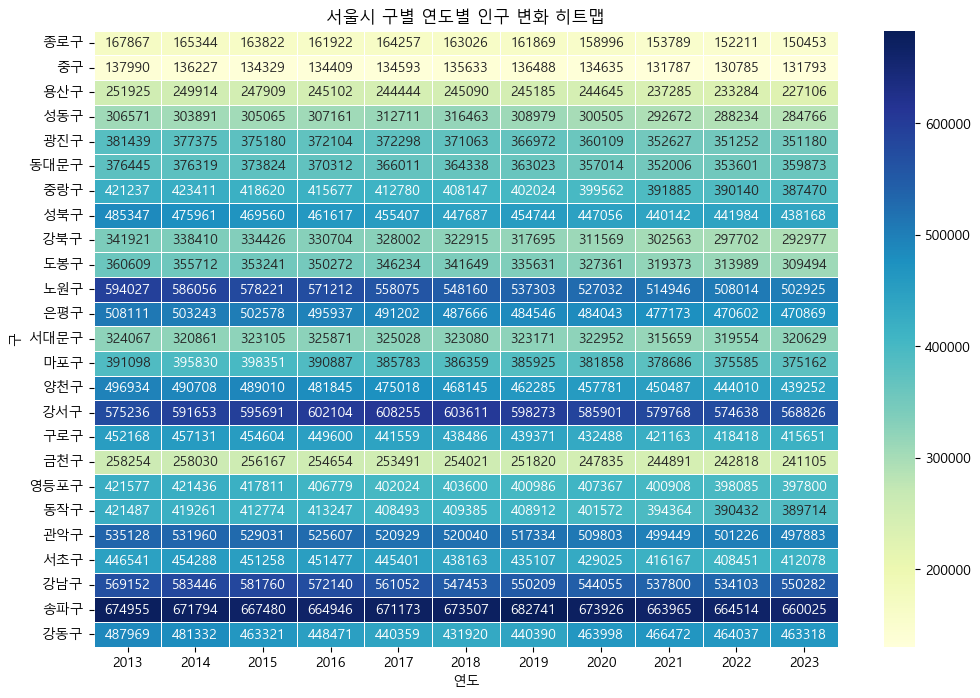

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 그래프에 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

# 파일 경로
file_path = 'C:/Users/user/Downloads/서울시_인구통계.xlsx'

# 엑셀 파일을 읽기
data = pd.read_excel(file_path)

# '동별' 컬럼을 인덱스로 설정
data.set_index('동별', inplace=True)

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)

plt.title("서울시 구별 연도별 인구 변화 히트맵")
plt.xlabel("연도")
plt.ylabel("구")
plt.show()

In [1]:
import pandas as pd

# 파일 경로 설정
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data01.xlsx'

# 엑셀 파일 로드
df = pd.read_excel(file_path)

# 'item' 컬럼의 데이터가 None인 경우를 처리하기 위한 함수
def safe_eval(data):
    if pd.isna(data):
        return {}
    try:
        return eval(data)
    except:
        return {}

# 'item' 컬럼에서 필요한 데이터를 추출하여 새로운 컬럼으로 저장
df['salesType'] = df['item'].apply(lambda x: safe_eval(x).get('salesType'))
df['serviceType'] = df['item'].apply(lambda x: safe_eval(x).get('serviceType'))
df['sales'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('sales'))
df['deposit'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('deposit'))
df['rent'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('rent'))
df['전용면적M2'] = df['item'].apply(lambda x: safe_eval(x).get('area', {}).get('전용면적M2'))
df['roomType'] = df['item'].apply(lambda x: safe_eval(x).get('roomType'))
df['title'] = df['item'].apply(lambda x: safe_eval(x).get('title'))
df['lat'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lat'))
df['lng'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lng'))
df['manageCost'] = df['item'].apply(lambda x: safe_eval(x).get('manageCost', {}).get('amount'))
df['updatedAt'] = df['item'].apply(lambda x: safe_eval(x).get('updatedAt'))
df['nearbyPois'] = df['item'].apply(lambda x: ', '.join([poi['poiType'] for poi in safe_eval(x).get('neighborhoods', {}).get('nearbyPois', [])]))
df['local1'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local1'))
df['local2'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local2'))
df['local3'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local3'))
df['fullText'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('fullText'))

# 데이터가 잘 분리되었는지 확인
df.head()

# 새로운 엑셀 파일로 저장
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data01_expanded_v2.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path

'C:/Users/user/Documents/python/project_ex/all_oneroom_data01_expanded_v2.xlsx'

In [2]:
import pandas as pd

# 파일 경로 설정
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data02.xlsx'

# 엑셀 파일 로드
df = pd.read_excel(file_path)

# 'item' 컬럼의 데이터가 None인 경우를 처리하기 위한 함수
def safe_eval(data):
    if pd.isna(data):
        return {}
    try:
        return eval(data)
    except:
        return {}

# 'item' 컬럼에서 필요한 데이터를 추출하여 새로운 컬럼으로 저장
df['salesType'] = df['item'].apply(lambda x: safe_eval(x).get('salesType'))
df['serviceType'] = df['item'].apply(lambda x: safe_eval(x).get('serviceType'))
df['sales'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('sales'))
df['deposit'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('deposit'))
df['rent'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('rent'))
df['전용면적M2'] = df['item'].apply(lambda x: safe_eval(x).get('area', {}).get('전용면적M2'))
df['roomType'] = df['item'].apply(lambda x: safe_eval(x).get('roomType'))
df['title'] = df['item'].apply(lambda x: safe_eval(x).get('title'))
df['lat'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lat'))
df['lng'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lng'))
df['manageCost'] = df['item'].apply(lambda x: safe_eval(x).get('manageCost', {}).get('amount'))
df['updatedAt'] = df['item'].apply(lambda x: safe_eval(x).get('updatedAt'))
df['nearbyPois'] = df['item'].apply(lambda x: ', '.join([poi['poiType'] for poi in safe_eval(x).get('neighborhoods', {}).get('nearbyPois', [])]))
df['local1'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local1'))
df['local2'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local2'))
df['local3'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local3'))
df['fullText'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('fullText'))

# 데이터가 잘 분리되었는지 확인
df.head()

# 새로운 엑셀 파일로 저장
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data02_expanded_v2.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path

'C:/Users/user/Documents/python/project_ex/all_oneroom_data02_expanded_v2.xlsx'

In [3]:
import pandas as pd

# 파일 경로 설정
file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data03.xlsx'

# 엑셀 파일 로드
df = pd.read_excel(file_path)

# 'item' 컬럼의 데이터가 None인 경우를 처리하기 위한 함수
def safe_eval(data):
    if pd.isna(data):
        return {}
    try:
        return eval(data)
    except:
        return {}

# 'item' 컬럼에서 필요한 데이터를 추출하여 새로운 컬럼으로 저장
df['salesType'] = df['item'].apply(lambda x: safe_eval(x).get('salesType'))
df['serviceType'] = df['item'].apply(lambda x: safe_eval(x).get('serviceType'))
df['sales'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('sales'))
df['deposit'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('deposit'))
df['rent'] = df['item'].apply(lambda x: safe_eval(x).get('price', {}).get('rent'))
df['전용면적M2'] = df['item'].apply(lambda x: safe_eval(x).get('area', {}).get('전용면적M2'))
df['roomType'] = df['item'].apply(lambda x: safe_eval(x).get('roomType'))
df['title'] = df['item'].apply(lambda x: safe_eval(x).get('title'))
df['lat'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lat'))
df['lng'] = df['item'].apply(lambda x: safe_eval(x).get('location', {}).get('lng'))
df['manageCost'] = df['item'].apply(lambda x: safe_eval(x).get('manageCost', {}).get('amount'))
df['updatedAt'] = df['item'].apply(lambda x: safe_eval(x).get('updatedAt'))
df['nearbyPois'] = df['item'].apply(lambda x: ', '.join([poi['poiType'] for poi in safe_eval(x).get('neighborhoods', {}).get('nearbyPois', [])]))
df['local1'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local1'))
df['local2'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local2'))
df['local3'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('local3'))
df['fullText'] = df['item'].apply(lambda x: safe_eval(x).get('addressOrigin', {}).get('fullText'))

# 데이터가 잘 분리되었는지 확인
df.head()

# 새로운 엑셀 파일로 저장
output_file_path = 'C:/Users/user/Documents/python/project_ex/all_oneroom_data03_expanded_v2.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path

'C:/Users/user/Documents/python/project_ex/all_oneroom_data03_expanded_v2.xlsx'

In [5]:
import pandas as pd
import requests
from io import BytesIO
import folium

# GitHub raw 파일 URL
url = 'https://raw.githubusercontent.com/aaqq8/SteadyEstate/main/seoul_oneroom_Sale_data.xlsx'

# 파일 가져오기
response = requests.get(url)

if response.status_code == 200:
    # 엑셀 파일을 pandas로 읽기 (openpyxl 엔진 사용)
    file_decoded = BytesIO(response.content)
    df = pd.read_excel(file_decoded, engine='openpyxl')

df

,agent,agentUserNos,subways,tags,item,danji,salesType,serviceType,sales,deposit,...,lat,lng,manageCost,updatedAt,nearbyPois,local1,local2,local3,fullText,subwayYN
0,"{'agentTitle': '집프로공인중개사사무소', 'agentAddress': ...",[],"[{'id': 95, 'name': '쌍문역', 'description': '4호선...",[],"{'itemId': 38990979, 'salesType': '매매', 'servi...",NaN,매매,빌라,23000,NaN,...,37.649771,127.029142,1.0,2024-01-01 03:02:35,"지하철역, 세탁소, 카페, 약국, 대형마트, 편의점, 버스정류장",서울시,도봉구,쌍문동,서울시 도봉구 쌍문동,O
1,"{'agentTitle': '리안공인중개사사무소', 'agentAddress': '...",[],"[{'id': 414, 'name': '신대방삼거리역', 'description':...",[],"{'itemId': 38992791, 'salesType': '매매', 'servi...",NaN,매매,빌라,34000,NaN,...,37.502056,126.928293,5.0,2023-12-18 16:31:45,"지하철역, 세탁소, 카페, 약국, 대형마트, 편의점, 버스정류장",서울시,동작구,대방동,서울시 동작구 대방동,O
2,"{'agentTitle': '대한공인중개사사무소', 'agentAddress': '...",[],"[{'id': 352, 'name': '강동역', 'description': '5호...",[],"{'itemId': 38993984, 'salesType': '매매', 'servi...",NaN,매매,빌라,28000,NaN,...,37.539000,127.133667,7.0,2024-01-06 16:02:37,"지하철역, 세탁소, 카페, 약국, 대형마트, 편의점, 버스정류장",서울시,강동구,천호동,서울시 강동구 천호동,O
3,"{'agentTitle': '정도공인중개사사무소', 'agentAddress': '...",[],"[{'id': 372, 'name': '망원역', 'description': '6호...",[],"{'itemId': 38994384, 'salesType': '매매', 'servi...",NaN,매매,빌라,55000,NaN,...,37.553334,126.907432,4.0,2023-12-07 17:55:46,"지하철역, 세탁소, 카페, 약국, 대형마트, 편의점, 버스정류장",서울시,마포구,망원동,서울시 마포구 망원동,O
4,"{'agentTitle': '에이밍공인중개사사무소', 'agentAddress': ...",[],"[{'id': 1251, 'name': '서울대벤처타운역', 'description...",[],"{'itemId': 38996868, 'salesType': '매매', 'servi...",NaN,매매,빌라,35000,NaN,...,37.466689,126.921730,0.0,2024-01-17 14:14:31,"지하철역, 세탁소, 카페, 약국, 대형마트, 편의점, 버스정류장",서울시,관악구,신림동,서울시 관악구 신림동,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,"{'agentTitle': '집프로공인중개사사무소', 'agentAddress': ...",[],"[{'id': 1123, 'name': '화계역', 'description': '우...",[],"{'itemId': 39555978, 'salesType': '매매', 'servi...",NaN,매매,빌라,22000,NaN,...,37.634971,127.019833,2.0,2024-02-02 17:43:00,"지하철역, 세탁소, 카페, 약국, 대형마트, 편의점, 버스정류장",서울시,강북구,수유동,서울시 강북구 수유동,O
560,"{'agentTitle': '참조은공인중개사사무소', 'agentAddress': ...",[],"[{'id': 430, 'name': '암사역', 'description': '8호...",[],"{'itemId': 39556635, 'salesType': '매매', 'servi...",NaN,매매,빌라,27000,NaN,...,37.550129,127.129432,2.0,2024-01-26 14:32:57,"지하철역, 세탁소, 카페, 약국, 대형마트, 편의점, 버스정류장",서울시,강동구,암사동,서울시 강동구 암사동,O
561,"{'agentTitle': '원공인중개사사무소', 'agentAddress': '서...",[],"[{'id': 96, 'name': '수유역', 'description': '4호선...",[],"{'itemId': 39556951, 'salesType': '매매', 'servi...",NaN,매매,빌라,28000,NaN,...,37.640203,127.024850,2.0,2024-01-24 15:22:03,"지하철역, 세탁소, 카페, 약국, 대형마트, 편의점, 버스정류장",서울시,강북구,수유동,서울시 강북구 수유동,O
562,"{'agentTitle': '참조은부동산공인중개사사무소', 'agentAddress...",[],"[{'id': 101, 'name': '한성대입구역', 'description': ...",[],"{'itemId': 39557695, 'salesType': '매매', 'servi...",NaN,매매,빌라,60000,NaN,...,37.590690,126.997715,5.0,2024-01-26 12:43:44,"지하철역, 세탁소, 카페, 약국, 대형마트, 편의점, 버스정류장",서울시,종로구,명륜1가,서울시 종로구 명륜1가,O


In [11]:
from folium.plugins import MarkerCluster


m = folium.Map(
    location=[lat, lng],
    zoom_start=15
)

coords = df[['lat', 'lng']]


marker_cluster = MarkerCluster().add_to(m)

count=0

# zip()로 묶어 주기
for lat, long in zip(coords['lat'], coords['lng']):
    count += 1
    folium.Marker([lat, lng], icon = folium.Icon(color="green")).add_to(marker_cluster)

print('count :', count)
m

NameError: name 'lat' is not defined

In [15]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import requests
from io import BytesIO

# GitHub raw 파일 URL
url = 'https://raw.githubusercontent.com/aaqq8/SteadyEstate/main/seoul_oneroom_Sale_data.xlsx'

# 파일 가져오기
response = requests.get(url)

if response.status_code == 200:
    # 엑셀 파일을 pandas로 읽기 (openpyxl 엔진 사용)
    file_decoded = BytesIO(response.content)
    df = pd.read_excel(file_decoded, engine='openpyxl')
    
# 데이터 로드
#file_path = '/mnt/data/seoul_oneroom_Sale_data.xlsx'
#df = pd.read_excel(file_path, engine='openpyxl')

# Folium 지도 객체 생성 (서울 중심부를 기본 좌표로 설정)
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 기본 지도에 마커 추가
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Price: {row['sales']}, Location: {row['local1']} {row['local2']} {row['local3']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# 가격에 따라 마커 색상을 다르게 설정
def get_color(price):
    if price < 10000:
        return 'green'
    elif 10000 <= price < 20000:
        return 'orange'
    else:
        return 'red'

for idx, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Price: {row['sales']}, Location: {row['local1']} {row['local2']} {row['local3']}",
        icon=folium.Icon(color=get_color(row['sales']), icon='info-sign')
    ).add_to(m)

# 마커 클러스터링
marker_cluster = MarkerCluster().add_to(m)

for idx, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"Price: {row['sales']}, Location: {row['local1']} {row['local2']} {row['local3']}",
        icon=folium.Icon(color=get_color(row['sales']), icon='info-sign')
    ).add_to(marker_cluster)

# 지도 저장
m.save('seoul_oneroom_map.html')

# 지도 표시 (Jupyter Notebook 환경에서 사용 가능)
m